# EDA To Prediction(feat. DieTanic)
* Reference Kaggle Notebbok
    * https://www.kaggle.com/ash316/eda-to-prediction-dietanic

* Data Discription
    * https://www.kaggle.com/c/titanic/data

"Sometimes life has a cruel sense of humor, giving you the thing you always wanted at the worst time possible." - Lisa Kleypas - 

---

* 📍 Review & Notice
    * Review - Day2. 20.05.16.sat
    * Again - Day2, Day3 20.05.17.sun

---

## Introduction

The Titanic Dataset is a very good dataset for begineers to start a journey in data science and participate in comptetitions in kaggle.

**The Objective of this notebook** is to give an idea how is the workflow in any predictive modeling problem.

* Objective
    * How do we check features
    * How do we add new features and some Machine Learning Concept
    
We try to  keep the notebook as basic as possible so that even newbies can understand every phase of it.

### Contents of the Notebook

* Part1: EDA(Exploratory Data Analysis)
    * Analysis of the Features - <code>Day1. Goal</code>
    * Finding any relations or trends considering multiple features <code>Day2. Goal</code>
* Part2: Feature Engineering and Data Cleaning
    * Add any few features
    * Removing redundant features
    * Converting features into suitable form for modeling

# Part1: EDA(Exploratory Data Analysis)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')  # ignore deprecation warnings
%matplotlib inline  # 노트북내 그래프 실행

UsageError: unrecognized arguments: # 노트북내 그래프 실행


In [2]:
data = pd.read_csv('./train.csv')  # set your path
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassId, Survived, Pclass, etc...

In [3]:
data.shape

(891, 12)

891개의 data point와 12개의 feature

*Q1. null값을 가지고 있는 data를 모두 찾기 위해서는 어떻게 해야할까?*

In [4]:
# checking for total null values

data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

data에 <code>.isnull()</code>함수와 <code>.sum()</code>함수 명령어를 입력해주면 쉽게 확인할 수 있다

Dataset에서 null값 확인

Age 177, Cabin(배의 선실,객실) 687, Embarked 2에서 각각 null값이 존재한다.

*Q2. How many Survived??*

<code>어떤 명령어</code>를 통해 확인할 수 있을까?

In [6]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<code>.value_counts()</code>함수를 통해 Survived class의 class별 data point 수를 쉽게 확인할 수 있다.

다른 Feature들에도 적용이 가능하다!

In [7]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

*Q3. 생존률은 얼마나 되고 몇 명이나 살아남았을까?*

<code>.plot.pie()</code><br>
<code>.countplot()</code>

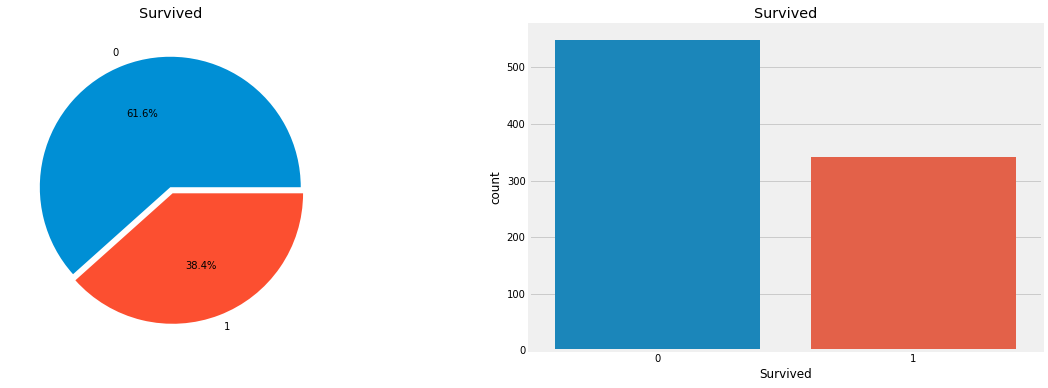

In [8]:
f, ax = plt.subplots(1, 2, figsize=(18, 6))

data.Survived.value_counts().plot.pie(explode=[0, 0.05], autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

Survival rate(생존 비율)을 데이터셋의 다른 특징들에 대해 확인해 보도록 한다.

앞으로 많은 Kernele들을 공부하다보면 익숙해지겠지?

## Analysing The Features

In [10]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Categorical Feature,

### 1) Categorical Feature

🔖Pandas <code>dataframe.groupby()</code><br>https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/<br>

<code>dataframe.groupby()</code> function is used to split the data into groups based on some criteria, object can be split on any of their axes.

In [37]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [56]:
pd.crosstab(data.Sex, data.Survived, margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


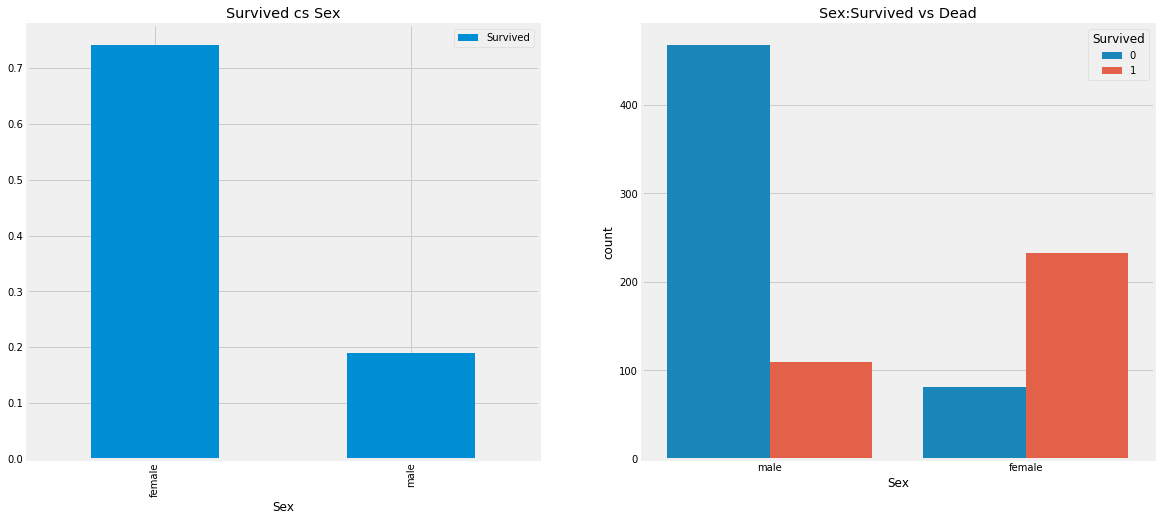

In [20]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['Sex', 'Survived']].groupby('Sex').mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived cs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

여성의 경우 생존 확률이 평균적으로 0.8로 나타남. 반면 남성의 경우 생존률이 0.2<br>
성별 생존여부를 보더라도 남성의 경우 사망이 생존보다 몇 배 높음.

좌석 등급에 따른 생존율은 어떻게 될까? 하나씩 살펴보도록한다.

### 2) Ordinal Feature

Ordinal Feature Pclass를 통해 데이터 분석을 해보자

🔖 Pandas <code>pandas.crosstab</code>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html

Compute a simple cross tabulation of two (or more) factors. By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.

In [43]:
pd.crosstab(data.Pclass, data.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [50]:
data.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<code>pd.crosstab</code>을 사용하면 앞서 배웠던 <code>pd.groupby</code>보다 데이터를 직관적으로 이해할 수 있는 것 같다.<br>
crosstab을 자주 사용하게 되지 않을까?

In [57]:
pd.crosstab(data.Sex, data.Survived, margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


*Q4. 순서형 Feature(Ordinal Feature)로는 어떤 시각화를 할 수 있을까?*

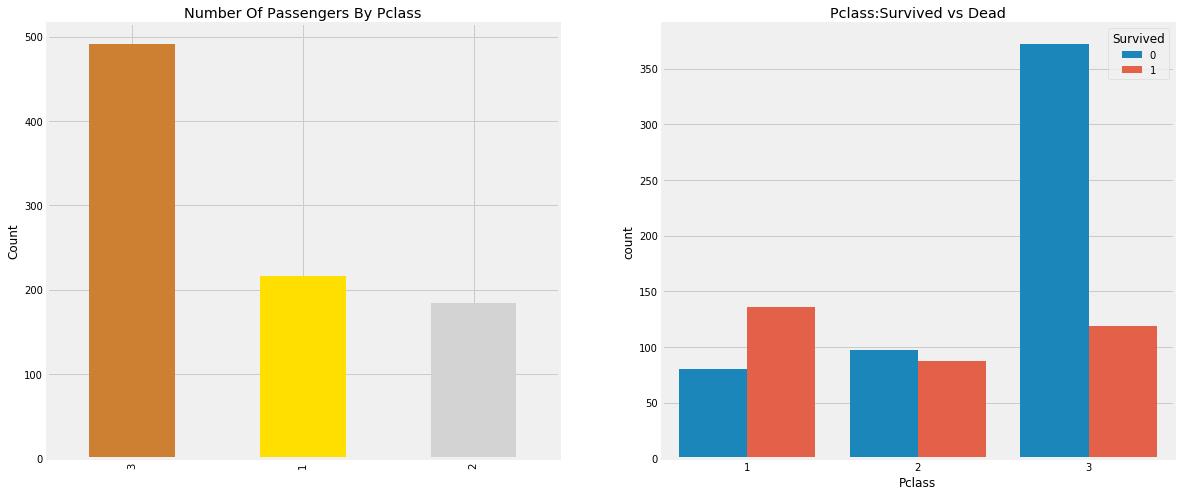

In [58]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

# Pclass의 class별 생존 수는 어떻게 될까?
# sns.countplot() 함수 사용
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

People say **Money Can't Buy Everything.** But we can clearly see that Passenegers Of Pclass 1 were given a very high priority while rescue. Even though that the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.

In [64]:
data[['Pclass', 'Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


In [65]:
data[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


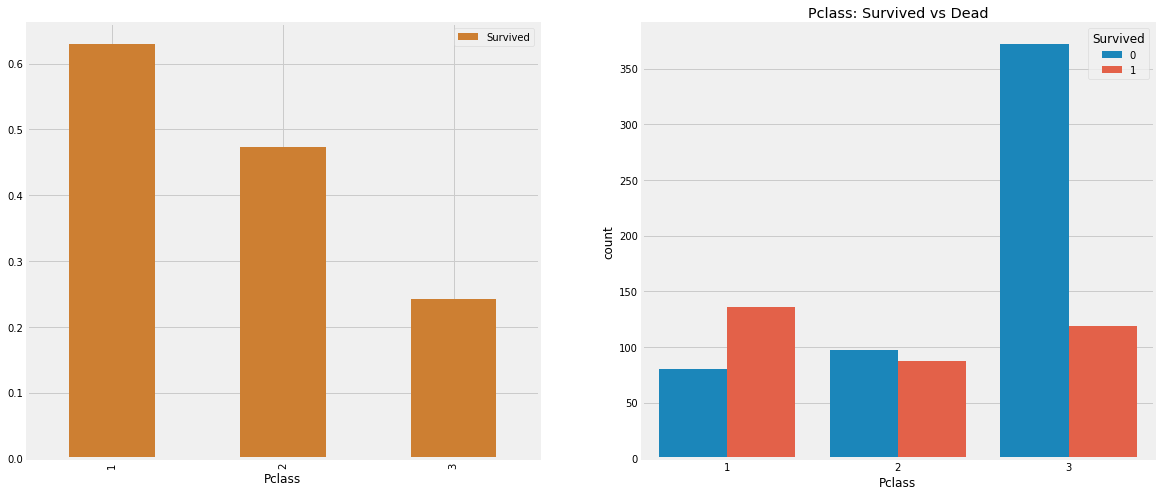

In [68]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data[['Pclass', 'Survived']].groupby('Pclass').mean().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

1등석의 승객의 경우 60%넘는 생존율을 보인다. 돈으로 모든 것을 살 수 없다고 하지만 1등석의 승객들의 생존률은 3등석의 생존률의 2배 이상이다

*Q5. Pclass와 성별에 따른 생존은 어떨까?*

In [67]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

3등석의 남자는 다 죽었구나...

*Q6. 남/녀의 생존확률은 어떨까? 탑승 등급에서 성별의 차이도 존재할까?*

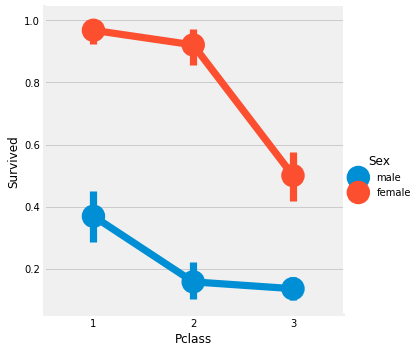

In [57]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

Pclass에 관계없이 여성이 더 우선적으로 살아남은 것으로 보인다.<br>
남/녀 할 것 없이 높은 등급의 좌석에 탑승하는게 생존율을 높이는데는 도움이 되었다

### 3. Continous Feature

In [71]:
print('Oldest Passenger was of:', data['Age'].max(), 'Year')
print('Youngest Passenger was of:', data['Age'].min(), 'Year')
print('Average Age on the ship:', data['Age'].mean(), 'Year')

Oldest Passenger was of: 80.0 Year
Youngest Passenger was of: 0.42 Year
Average Age on the ship: 29.69911764705882 Year


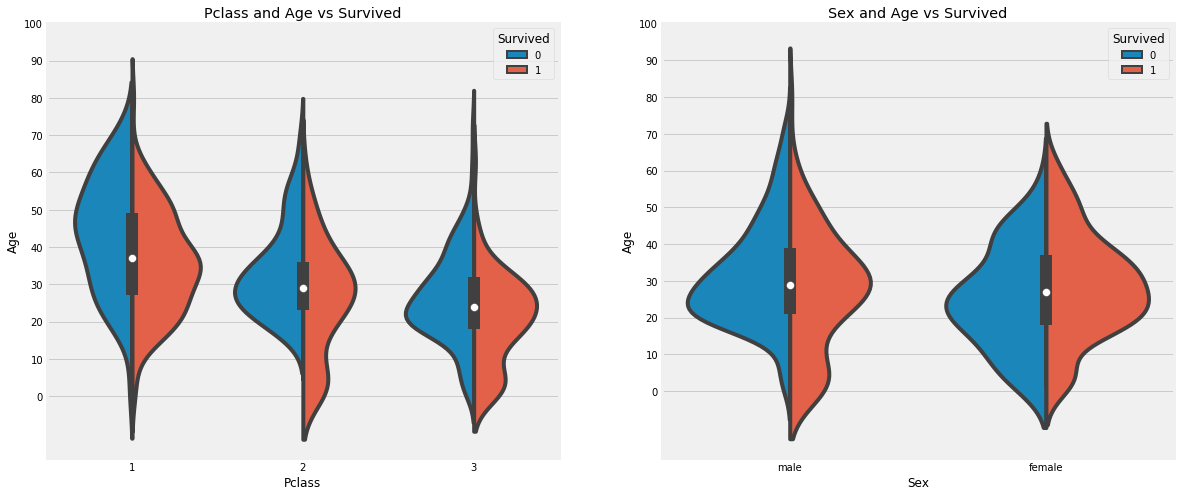

In [73]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot("Pclass", "Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

# Sex&Age, Survived
sns.violinplot("Sex", "Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

전에도 그랬고... 지금봐도 이 Violin plot은 참 적응이 안된다.. -20.05.17.sum-

🔖 <code>seaborn.violinplot</code><br>
https://seaborn.pydata.org/generated/seaborn.violinplot.html<br>

Draw a combination of boxplot and kernel density estimate

**Observations:**<br>
1) The number of children increases with Pclass and the susrvival rate for passengers below Age 10 looks to be good irrespective of the Pclass<br>
Pclass가 1등급에서 3등급으로 갈 수록 어린아이의 수는 많아진다. 그리고 10세 이하의 생존율은 Pclass에 관계없이 높다.<br>
2) Survival chances for Passengers aged 20-50 from Pclass 1 is high and is even better for Women<br>
Pclass1에서는 20-50대의 생존률이 높다. 그리고 여성의 경우도 마찬가지이다.<br>
3) For males, the survival chances decreases with an increase in age.<br>
남성의 경우 age가 증가할수록 생존율이 낮아지는 것을 알 수 있다.

이 외에 더 흥미로운 요소들이 많을텐데 생각해보면 좋을 거라 생각합니다<br>
<code>violinplot</code>에 대해서도 자세히 공부할 필요가 있겠네요.

---

basic Feature Analysis

---


In [77]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

"As we had seen earlier, the Age feature has 177 null values. <code>To replace these NaN values</code>, we can assign them the mean age of the dataset.

But the problem is, there were many people with many different ages. We just cant assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??

we can check the Name feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups."


Age Feature에 177개의 Null값을 채워줄 것입니다. 어떻게 할 수 있을까요??<br>
Age의 평균 값을 한 번 보겠습니다.

In [79]:
data.Age.mean()

29.69911764705882

우선, Null 값을 모두 29세로 채워주는 방법이 있을 수 있겠습니다. 더 좋은 방법은 없을까요?

...

Notebook kernel을 만들어주신 Swain님께서는 흥미로운 발상을 하셨습니다. 바로 Name Feature를 확인하는 것입니다!<br>
Mr, Mrs, ... 

## Appendix

### Notebook을 공부하면서 정리하는 기본 개념들

1. <code>pandas.DataFrame.count</code>

Count non-NA cells for each column or row.

2. <code>violinplot</code><br>
https://seaborn.pydata.org/generated/seaborn.violinplot.html

상자 그림과 커널 밀도 추정값의 조합을 그립니다.

<code>Violin plot</code>은 box plot 및 whisker plot과 비슷한 역할을 합니다. <code>Violin plot</code>은 정량적 데이터의 분포를 보여줍니다. 하나 또는 그 이상의 범주형 변수의 몇몇 특성들을 통해 분포를 비교할 수 있게 됩니다. 

모든 플롯 구성 요소가 실제 데이터 포인트에 해당하는 box plot과 달리 <code>Violin plot</code>에는 기본 분포의 커널 밀도 추정(kernel density estimation)이 있습니다.

자세한 정보는 <a src="https://seaborn.pydata.org/generated/seaborn.violinplot.html">Document</a>를 참고하시면 좋을 것 같습니다.